In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
train_info=pd.read_csv("../info/train_info.csv")
train_info=train_info[train_info['clear']==1]
train_info=train_info.groupby(['sha256','subject']).first().reset_index()
train_info['word']=train_info['path'].map(lambda u: u.split("/")[2])
train_info.shape

(64133, 12)

In [3]:
train_info[['word' ,'path']].groupby('word').count().sort_values('path')

path
word        
bed     1709
bird    1725
tree    1726
cat     1728
sheila  1728
wow     1736
happy   1737
marvin  1739
dog     1742
house   1746
up      2310
off     2325
left    2331
eight   2333
three   2334
right   2338
go      2339
five    2339
nine    2340
two     2341
four    2341
down    2343
on      2343
six     2344
one     2346
yes     2349
no      2354
stop    2354
zero    2355
seven   2358

In [4]:
len(set(train_info['subject']))

1880

In [5]:
df=train_info[['word','subject','path']].groupby(['word','subject']).count().reset_index().sort_values('path')
df.shape

(35558, 3)

In [6]:
df.max()

word           zero
subject    fffcabd1
path              7
dtype: object

In [7]:
df[['word','subject']].groupby('word').count().sort_values('subject')

subject
word           
house      1164
off        1168
tree       1170
two        1174
eight      1176
sheila     1176
bed        1177
wow        1177
up         1177
one        1177
happy      1178
left       1179
cat        1180
five       1181
go         1181
nine       1182
zero       1186
marvin     1189
four       1189
seven      1191
stop       1191
bird       1193
right      1194
six        1196
three      1198
on         1198
yes        1200
no         1203
down       1206
dog        1207

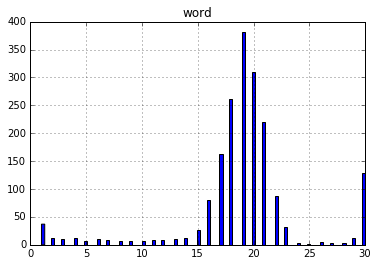

In [8]:
df[['word','subject']].groupby('subject').count().hist(bins=100);

In [9]:
import soundfile
import io
import hashlib
import librosa
from IPython.display import Audio
import scipy.signal
import scipy.io.wavfile as wavfile

In [10]:
def padto16000(x):
    assert len(x) <= 16000
    if len(x)==16000: return x
    #return np.interp(np.arange(16000)/16000.0, np.arange(len(x))/float(len(x)),x)
    n=len(x)
    m=int((16000-n)/2.0)
    if m==0:
        return np.concatenate([x,np.zeros(16000-n-m)]) 
    else:
        return np.concatenate([np.zeros(m),x,np.zeros(16000-n-m)])     
def random_augu(x):
    if random.random()>0.5:
        r=random.random()*0.5+1
        x1=librosa.effects.time_stretch(x,r)
    else:
        n=int((random.random()-0.5)*0.8*24)
        x1=librosa.effects.pitch_shift(x,sr=16000,n_steps=n,bins_per_octave=24)
    return padto16000(x1)

In [11]:
x=soundfile.read('../input/'+'train/audio/tree/1ba20be2_nohash_0.wav')[0]
x.shape,x.dtype

((16000,), dtype('float64'))

In [12]:
random_augu(x).shape

(16000,)

In [13]:
Audio(random_augu(x),rate=16000)

In [14]:
folders=!ls ../input/train/audio/|grep -v .txt | grep -v _backg
str(folders)

"['bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go', 'happy', 'house', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'wow', 'yes', 'zero']"

In [16]:
!rm -fr ../input/train3
!mkdir -p ../input/train3/audio
for folder in folders:
    !mkdir -p ../input/train3/audio/{folder}

In [17]:
I=0
def make_one(df):

    word=df['word'].iloc[0]
    files=df['path'].values
    
    global I
    if I%500==0: print (I,word),
    I=I+1
    
    if 1:
        for i in range(2*len(files)):
            fname="../input/"+random.choice(files,1)[0]
            x=soundfile.read(fname)[0]
            newx=random_augu(x)
            surfix="_c{}.wav".format(i)
            newfilename=fname.replace("/train/","/train3/").replace(".wav",surfix)
            assert fname<>newfilename            
            soundfile.write(newfilename,newx,samplerate=16000)
        return len(files)

In [18]:
train_info[['subject','word','path']].groupby(['word','subject']).apply(lambda u: make_one(u))

(0, 'bed') (500, 'bed') (1000, 'bed') (1500, 'bird') (2000, 'bird') (2500, 'cat') (3000, 'cat') (3500, 'cat') (4000, 'dog') (4500, 'dog') (5000, 'down') (5500, 'down') (6000, 'eight') (6500, 'eight') (7000, 'eight') (7500, 'five') (8000, 'five') (8500, 'four') (9000, 'four') (9500, 'four') (10000, 'go') (10500, 'go') (11000, 'happy') (11500, 'happy') (12000, 'house') (12500, 'house') (13000, 'house') (13500, 'left') (14000, 'left') (14500, 'marvin') (15000, 'marvin') (15500, 'nine') (16000, 'nine') (16500, 'nine') (17000, 'no') (17500, 'no') (18000, 'off') (18500, 'off') (19000, 'on') (19500, 'on') (20000, 'on') (20500, 'one') (21000, 'one') (21500, 'right') (22000, 'right') (22500, 'right') (23000, 'seven') (23500, 'seven') (24000, 'sheila') (24500, 'sheila') (25000, 'six') (25500, 'six') (26000, 'six') (26500, 'stop') (27000, 'stop') (27500, 'three') (28000, 'three') (28500, 'tree') (29000, 'tree') (29500, 'tree') (30000, 'two') (30500, 'two') (31000, 'up') (31500, 'up') (32000, 'wow

word  subject 
bed   00176480    1
      004ae714    2
      00f0204f    2
      012c8314    2
      0132a06d    1
      0135f3f2    1
      0137b3f4    1
      014f9f65    1
      01648c51    2
      016e2c6d    1
      01b4757a    2
      01bcfc0c    1
      0227998e    1
      026290a7    1
      02746d24    1
      035de8fe    1
      0362539c    2
      037c445a    1
      0397ecda    1
      03c96658    1
      042186b8    1
      042ea76c    1
      0447d7c1    1
      0474c92a    2
      05739450    1
      05b2db80    1
      05d18852    1
      06076b6b    1
      060cd039    2
      063d48cf    2
                 ..
zero  f9bdf10e    1
      f9ebdba0    2
      f9f9751d    3
      fa446c16    1
      fa44fcf5    2
      fa7895de    2
      fac74f6a    1
      facd97c0    2
      fad7a69a    2
      fb01a182    1
      fb24c826    1
      fb2f3242    2
      fb7c9b3b    1
      fbe51750    1
      fbf3dd31    1
      fc28c8d8    3
      fcb25a78    1
      fce96bac    2
     

In [31]:
!cp -r ../input/train/audio/_background_noise_/ ../input/train3/audio/

In [33]:
newtrain=train_info[train_info['word']=="AAAAA"]

In [34]:
newtrain

Empty DataFrame
Columns: [sha256, subject, label, path, target, subject_id, id, fold, compress_ratio, compress_ratio2, clear, word]
Index: []

In [35]:
words=set(train_info['word'])
str(words)

"set(['sheila', 'seven', 'right', 'house', 'dog', 'down', 'zero', 'go', 'yes', 'no', 'wow', 'six', 'three', 'bird', 'happy', 'on', 'marvin', 'stop', 'five', 'two', 'one', 'four', 'off', 'tree', 'up', 'bed', 'cat', 'nine', 'eight', 'left'])"

In [36]:
import os
all_files=[]
for word in words:
    files=[u for u in os.listdir('../input/train3/audio/'+str(word)) if u.endswith('.wav')]
    print word, len(files),
    files=["train3/audio/{}/{}".format(word,u) for u in files]
    all_files+=files

sheila 3456 seven 4716 right 4676 house 3492 dog 3484 down 4686 zero 4710 go 4678 yes 4698 no 4708 wow 3472 six 4688 three 4668 bird 3450 happy 3474 on 4686 marvin 3478 stop 4708 five 4678 two 4682 one 4692 four 4682 off 4650 tree 3452 up 4620 bed 3418 cat 3456 nine 4680 eight 4666 left 4662


In [37]:
newtrain['path']=[ u for u in all_files]

/home/bo/anaconda2/envs/tensorflow14/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [43]:
newtrain['subject']=newtrain['path'].map(lambda u: u.split('/')[3].split('_')[0])

/home/bo/anaconda2/envs/tensorflow14/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [44]:
subjects=list(set(newtrain['subject']))
subjects=dict(zip(subjects,np.random.permutation(range(len(subjects)))))

In [46]:
newtrain['sha256']=range(len(newtrain))
newtrain['clear']=1
newtrain['subject_id']=newtrain['subject'].map(lambda u: subjects[u])
newtrain['fold']=newtrain['subject_id'].map(lambda u: u%10)
newtrain['id']=range(len(newtrain))
newtrain['word']=newtrain['path'].map(lambda u: u.split('/')[2] )

/home/bo/anaconda2/envs/tensorflow14/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/bo/anaconda2/envs/tensorflow14/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/bo/anaconda2/envs/tensorflow14/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [47]:
regular_words=['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop',  'up', 'yes']
newtrain['label']=newtrain['word'].map(lambda u: 'unknown' if u not in regular_words else u)

/home/bo/anaconda2/envs/tensorflow14/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [48]:
newtrain.head()

sha256   subject    label                                          path  \
0       0  1993db46  unknown  train3/audio/sheila/1993db46_nohash_0_c0.wav   
1       1  8c4854bc  unknown  train3/audio/sheila/8c4854bc_nohash_1_c1.wav   
2       2  1d919a90  unknown  train3/audio/sheila/1d919a90_nohash_1_c2.wav   
3       3  80b8eab4  unknown  train3/audio/sheila/80b8eab4_nohash_0_c0.wav   
4       4  67c7fecb  unknown  train3/audio/sheila/67c7fecb_nohash_1_c3.wav   

   target  subject_id  id  fold  compress_ratio  compress_ratio2  clear  \
0     NaN         917   0     7             NaN              NaN      1   
1     NaN         301   1     1             NaN              NaN      1   
2     NaN        1218   2     8             NaN              NaN      1   
3     NaN         674   3     4             NaN              NaN      1   
4     NaN        1535   4     5             NaN              NaN      1   

     word  
0  sheila  
1  sheila  
2  sheila  
3  sheila  
4  sheila

In [49]:
newtrain['label'].value_counts()

unknown    81494
no          4708
stop        4708
yes         4698
on          4686
down        4686
go          4678
right       4676
left        4662
off         4650
up          4620
Name: label, dtype: int64

In [50]:
newtrain.to_csv("../info/train3_info.csv",index=None)